# ML comparisons

In [32]:
import pandas as pd
from remseno import *

data_dir = '../data/to_publish/'

neon_gold_df = pd.read_csv(f'{data_dir}training_pixels_neon_validation_nn.csv')
tallo_training_df = pd.read_csv(f'{data_dir}Tallo_pixel_training_data.csv')
shared_species = list(set(neon_gold_df.species) & set(tallo_training_df.species))
print("Shared species:", shared_species)

Shared species: ['Acer saccharum', 'Pinus echinata', 'Pinus taeda', 'Ulmus americana', 'Quercus velutina', 'Picea abies', 'Juglans nigra', 'Pseudotsuga menziesii', 'Tilia americana', 'Pinus strobus', 'Quercus nigra']


In [60]:
tallo_training_df

,id,lat,lon,species,image_id,path,band_1,band_2,band_3,band_4,...,gndvi,pri,osavi,tcari,redge,redge2,siredge,normg,schl,schlcar
0,T_449191,220819.5,3623323.5,Quercus nigra,20230213_152323_40_24b6,../data/harvard/neon_harvard/e64f899b-131e-4d0...,358,347,441,481,...,0.639295,71.036876,0.563630,261676.8,4372.000000,1220.000000,0.634096,0.334492,0.437768,62.195052
1,T_449191,220822.5,3623323.5,Quercus nigra,20230213_152323_40_24b6,../data/harvard/neon_harvard/e64f899b-131e-4d0...,350,351,452,495,...,0.631559,69.158395,0.559001,273127.2,4335.288889,1226.222222,0.633299,0.337653,0.431366,60.977612
2,T_449191,220825.5,3623323.5,Quercus nigra,20230213_152323_40_24b6,../data/harvard/neon_harvard/e64f899b-131e-4d0...,330,353,468,530,...,0.609000,65.605210,0.562848,236251.2,3876.418868,1084.188679,0.647558,0.354990,0.443927,60.662338
3,T_449191,220828.5,3623323.5,Quercus nigra,20230213_152323_40_24b6,../data/harvard/neon_harvard/e64f899b-131e-4d0...,292,325,427,526,...,0.605105,68.664218,0.561691,212544.0,3739.467681,1049.429658,0.652174,0.362509,0.444850,63.644596
4,T_449191,220831.5,3623323.5,Quercus nigra,20230213_152323_40_24b6,../data/harvard/neon_harvard/e64f899b-131e-4d0...,317,330,439,522,...,0.618002,68.109261,0.565832,231368.4,4006.908046,1110.915709,0.647992,0.356314,0.447946,62.131179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327542,T_449191,249052.5,3836278.5,Pinus echinata,20230203_152345_34_24b0,../data/harvard/neon_harvard/f3d6e33d-8b58-4f6...,500,523,694,790,...,0.527653,44.097035,0.421795,166470.0,4362.905063,1774.191139,0.770200,0.335884,0.335559,37.617426
327543,T_449191,249055.5,3836278.5,Pinus echinata,20230203_152345_34_24b0,../data/harvard/neon_harvard/f3d6e33d-8b58-4f6...,477,542,666,775,...,0.515776,45.403886,0.423271,187597.2,4085.070968,1655.245161,0.753257,0.336957,0.328835,39.550637
327544,T_449191,249058.5,3836278.5,Pinus echinata,20230203_152345_34_24b0,../data/harvard/neon_harvard/f3d6e33d-8b58-4f6...,481,486,643,778,...,0.494641,46.024631,0.402602,182392.2,3847.816195,1638.791774,0.753267,0.346702,0.304785,40.171904
327545,T_449191,249061.5,3836278.5,Pinus echinata,20230203_152345_34_24b0,../data/harvard/neon_harvard/f3d6e33d-8b58-4f6...,465,511,620,765,...,0.474768,47.213718,0.390271,182595.6,3540.690196,1552.760784,0.747026,0.344905,0.287055,41.750320


# Do a final visualisation of the dataset

In [ ]:
# Filter to only include species in NEON
geometry = [Point(xy) for xy in zip(tallo_df['longitude'], tallo_df['latitude'])]
gdf = GeoDataFrame(tallo_df, geometry=geometry)  

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color=tallo_colour, markersize=5)

geometry = [Point(xy) for xy in zip(neon_df['longitude'], neon_df['latitude'])]
gdf = GeoDataFrame(neon_df, geometry=geometry)   

gdf.plot(ax=ax, marker='o', color=neon_colour, markersize=5)
plt.axis('off')
plt.savefig(f'{fig_dir}Figure1_shared_many_species_map.svg')
plt.show()

c = Countplot(tallo_df, x='family', figsize=(8, 3), config=tallo_config)
c.plot()
plt.title('Tallo family')
plt.savefig(f'{fig_dir}Figure1_tallo_family_shared_many_species.svg')
plt.show()

c = Countplot(neon_df, x='family', figsize=(8, 3), config=neon_config)
c.plot()
plt.title('Neon family')
plt.savefig(f'{fig_dir}Figure1_neon_family_shared_many_species.svg')
plt.show()

c = Countplot(tallo_df, x='genus', figsize=(8, 3), config=tallo_config)
c.plot()
plt.title('Tallo genus')
plt.savefig(f'{fig_dir}Figure1_tallo_genus_shared_many_species.svg')
plt.show()

c = Countplot(neon_df, x='genera', figsize=(8, 3), config=neon_config)
c.plot()
plt.title('Neon genera')
plt.savefig(f'{fig_dir}Figure1_neon_genus_shared_many_species.svg')
plt.show()

In [33]:
import itertools
comb_2 = list(itertools.combinations(shared_species, 2))
comb_3 = list(itertools.combinations(shared_species, 3))
comb_4 = list(itertools.combinations(shared_species, 4))

In [34]:
comb_4

[('Acer saccharum', 'Pinus echinata', 'Pinus taeda', 'Ulmus americana'),
 ('Acer saccharum', 'Pinus echinata', 'Pinus taeda', 'Quercus velutina'),
 ('Acer saccharum', 'Pinus echinata', 'Pinus taeda', 'Picea abies'),
 ('Acer saccharum', 'Pinus echinata', 'Pinus taeda', 'Juglans nigra'),
 ('Acer saccharum', 'Pinus echinata', 'Pinus taeda', 'Pseudotsuga menziesii'),
 ('Acer saccharum', 'Pinus echinata', 'Pinus taeda', 'Tilia americana'),
 ('Acer saccharum', 'Pinus echinata', 'Pinus taeda', 'Pinus strobus'),
 ('Acer saccharum', 'Pinus echinata', 'Pinus taeda', 'Quercus nigra'),
 ('Acer saccharum', 'Pinus echinata', 'Ulmus americana', 'Quercus velutina'),
 ('Acer saccharum', 'Pinus echinata', 'Ulmus americana', 'Picea abies'),
 ('Acer saccharum', 'Pinus echinata', 'Ulmus americana', 'Juglans nigra'),
 ('Acer saccharum',
  'Pinus echinata',
  'Ulmus americana',
  'Pseudotsuga menziesii'),
 ('Acer saccharum', 'Pinus echinata', 'Ulmus americana', 'Tilia americana'),
 ('Acer saccharum', 'Pinus 

# Filter the datasets to only include the shared species

In [35]:
u = SciUtil()
shared_species = set(neon_gold_df.species) & set(tallo_training_df.species)
tallo_training_df = tallo_training_df[tallo_training_df.species.isin(shared_species)]
neon_gold_df = neon_gold_df[neon_gold_df.species.isin(shared_species)]

# Print the value counts of both
u.dp(['Tallo Training: '])
print(tallo_training_df.species.value_counts())

u.dp(['Neon Validation: '])
print(neon_gold_df.species.value_counts())

# Make a training sample that is a subsample with "even" classes
max_sample = 1000
train_df = pd.DataFrame()# Get a random sample which is even between each species

for species in set(tallo_training_df['species'].values):
    s_df = tallo_training_df[tallo_training_df['species'] == species]
    train_df = pd.concat([train_df, s_df.sample(min(1000, len(s_df)))])


--------------------------------------------------------------------------------
                               Tallo Training: 	                                
--------------------------------------------------------------------------------
species
Picea abies              46254
Juglans nigra            28699
Quercus nigra            28609
Pinus echinata           28561
Pinus strobus            28547
Acer saccharum           28473
Ulmus americana          28172
Tilia americana          28164
Pinus taeda              28160
Quercus velutina         28123
Pseudotsuga menziesii    25785
Name: count, dtype: int64
--------------------------------------------------------------------------------
                               Neon Validation: 	                               
--------------------------------------------------------------------------------
species
Pseudotsuga menziesii    650
Acer saccharum           337
Ulmus americana          230
Juglans nigra            174
Quercus nigra  

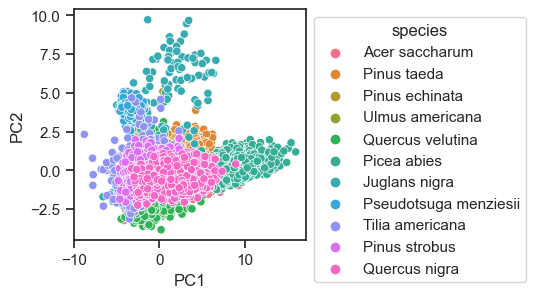

In [64]:
# We can make a PCA of the normalised values
from sklearn.decomposition import PCA
import seaborn as sns
masking_cols = [f'band_{i}' for i in bands] + ['nitian', 'ndvi', 'sr', 'tvi', 'gi', 'gndvi', 'pri', 'osavi', 'tcari', 'redge', 'redge2',
            'siredge', 'normg', 'schl', 'schlcar']
fig_dir = f'{data_dir}figs/'
t_df = train_df.copy()
X = train_df[masking_cols].values
X = np.nan_to_num(X)
pca = PCA(n_components=2)
min_x = X.min(axis=0)
max_x = X.max(axis=0)
mean_x = X.mean(axis=0)
std_x = X.std(axis=0)
X = (X - mean_x)/std_x
X_std = (X - min_x) / (max_x - min_x)

pca.fit(X_std)
pc_X = pca.transform(X_std)
t_df['PC1'] = pc_X[:, 0]
t_df['PC2'] = pc_X[:, 1]

ax = sns.scatterplot(data=t_df, x='PC1', y='PC2', hue='species')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.savefig(f'{fig_dir}Figure3_PCA_train_even_sample.svg')

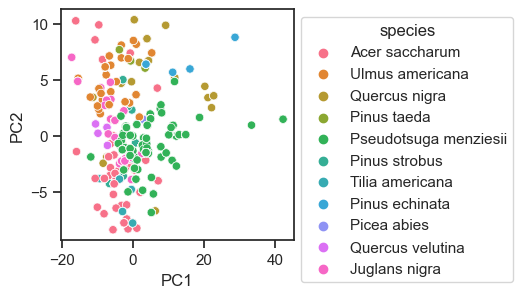

In [66]:
# We can make a PCA of the normalised values
from sklearn.decomposition import PCA
import seaborn as sns
masking_cols = [f'band_{i}' for i in bands] + ['nitian', 'ndvi', 'sr', 'tvi', 'gi', 'gndvi', 'pri', 'osavi', 'tcari', 'redge', 'redge2',
            'siredge', 'normg', 'schl', 'schlcar']
fig_dir = f'{data_dir}figs/'
t_df = neon_gold_df.copy()
X = t_df[masking_cols].values
X = np.nan_to_num(X)
pca = PCA(n_components=2)
min_x = X.min(axis=0)
max_x = X.max(axis=0)
mean_x = X.mean(axis=0)
std_x = X.std(axis=0)
X = (X - mean_x)/std_x
X_std = (X - min_x) / (max_x - min_x)

pca.fit(X_std)
pc_X = pca.transform(X_std)
t_df['PC1'] = pc_X[:, 0]
t_df['PC2'] = pc_X[:, 1]

ax = sns.scatterplot(data=t_df, x='PC1', y='PC2', hue='species')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.savefig(f'{fig_dir}Figure3_PCA_valid_even_sample.svg')

# Try different classififications using different models and number of class probelms


1. 2 class problem
2. 2 class imbalanced problem
3. 3 class problem
4. 4 class problem
5. All

In [78]:
from remseno import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import average_precision_score, balanced_accuracy_score, class_likelihood_ratios, f1_score, precision_score, roc_auc_score, roc_curve
plt.rcParams["figure.figsize"] = (4,4)

all_scores = []
    
# Maybe add in https://scikit-learn.org/stable/modules/generated/sklearn.metrics.brier_score_loss.html#sklearn.metrics.brier_score_loss
def get_scores(y, y_pred, print_scores=True, plot_plots=False):
#     scores = {#'average_precision_score': average_precision_score(y, y_pred), 
#               'balanced_accuracy_score': balanced_accuracy_score(y, y_pred),
#               #'class_likelihood_ratios': class_likelihood_ratios(y, y_pred),
#               #'f1_score': f1_score(y, y_pred),
#               #'precision_score': precision_score(y, y_pred),
#               #'recall_score': recall_score(y, y_pred)
#              }
# #     plots = {'roc_auc_score': roc_auc_score(y, y_pred), 
# #              'precision_recall_curve': precision_recall_curve(y, y_pred), # precision, recall, thresholds
# #              'roc_curve': roc_curve(y, y_pred)} # fpr, tpr, thresholds
#     plot = {}
#     for score in scores:
#         print(score, scores[score])
    score = balanced_accuracy_score(y, y_pred)
    
    return [score]#, plot
    
def classify(training_df, training_cols, clf=None, test_percent=30, label='', plot_on=True, clf_type='rf'):
    X = training_df[training_cols].values
    X = np.nan_to_num(X)
    min_x = X.min(axis=0)
    max_x = X.max(axis=0)
    mean_x = X.mean(axis=0)
    std_x = X.std(axis=0)
    X = (X - min_x) / (max_x - min_x)
    y = training_df['species']
    if not clf:
        if clf_type == 'rf':
            clf = RandomForestClassifier(max_depth=20, random_state=0)#svm.LinearSVC(multi_class="crammer_singer", class_weight='balanced')
        elif clf_type == 'svm':
            clf = svm.LinearSVC(multi_class="crammer_singer", class_weight='balanced')
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_percent/100,
                                                            random_state=18)
        # Get the pixels from the orthomosaic
        clf = clf.fit(X_train, y_train)
        # Swap over to have plotting all done with the test set
        X = X_test
        y = y_test
        
    y_pred = clf.predict(X)
    if plot_on:
        cm = confusion_matrix(y, y_pred, labels=clf.classes_)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
        disp.plot()
        plt.title(label)
        plt.xticks(rotation=45, ha='right')
        plt.savefig(f'{fig_dir}Figure3_{label}.svg')
        plt.show()
    return clf# get_scores(y, y_pred), clf


In [47]:
scores = []
for test_species in comb_2:
    training_df = train_df[train_df.species.isin(test_species)]
    valid_df = neon_gold_df[neon_gold_df.species.isin(test_species)]
    score, clf = classify(training_df, training_cols, label='2 class training')
    scores.append([test_species[0], test_species[1], 'Training'] + score)
    score, clf = classify(valid_df, training_cols, clf=clf, label='2 class validation')
    scores.append([test_species[0], test_species[1], 'Validation'] + score)

/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/sciviso/boxplot.py:121: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.swarmplot(data=vis_df, x=x, y=y, hue_order=hue_order,
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 49.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 52.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Training v.s. Validation: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.805e-18 U_stat=2.962e+03


<Axes: >

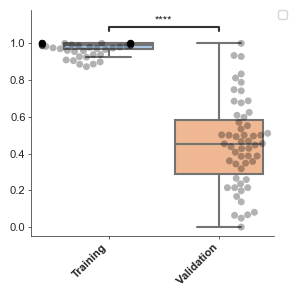

In [55]:
from sciviso import Boxplot

boxplot = Boxplot(results, "label", "score", add_dots=True)
boxplot.plot()

In [49]:
results = pd.DataFrame(scores, columns=['species1', 'species2', 'label', 'score'])
results.describe()


,score
count,110.000000
mean,0.713484
std,0.311955
min,0.000000
25%,0.453444
50%,0.892853
75%,0.991171
max,1.000000


In [50]:
results[results['label'] == 'Validation'].describe()


,score
count,55.000000
mean,0.451890
std,0.236277
min,0.000000
25%,0.291271
50%,0.453077
75%,0.583973
max,1.000000


In [51]:
results.sort_values(['label', 'score'], ascending=[False, False])

,species1,species2,label,score
69,Quercus velutina,Picea abies,Validation,1.000000
81,Picea abies,Juglans nigra,Validation,0.933908
85,Picea abies,Tilia americana,Validation,0.928571
45,Pinus taeda,Juglans nigra,Validation,0.833333
23,Pinus echinata,Ulmus americana,Validation,0.811491
...,...,...,...,...
14,Acer saccharum,Tilia americana,Training,0.905617
0,Acer saccharum,Pinus echinata,Training,0.898832
92,Juglans nigra,Tilia americana,Training,0.886874
22,Pinus echinata,Ulmus americana,Training,0.886040


In [56]:
scores = []
for test_species in comb_3:
    training_df = train_df[train_df.species.isin(test_species)]
    valid_df = neon_gold_df[neon_gold_df.species.isin(test_species)]
    score, clf = classify(training_df, training_cols, label='2 class training')
    scores.append([test_species[0], test_species[1], test_species[2], 'Training'] + score)
    score, clf = classify(valid_df, training_cols, clf=clf, label='2 class validation')
    scores.append([test_species[0], test_species[1], test_species[2], 'Validation'] + score)

            score
count  165.000000
mean     0.268671
std      0.169285
min      0.000000
25%      0.119240
50%      0.262626
75%      0.388889
max      0.728395


/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/sciviso/boxplot.py:121: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.swarmplot(data=vis_df, x=x, y=y, hue_order=hue_order,
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 64.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 7.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Training v.s. Validation: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.337e-55 U_stat=2.722e+04


/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 72.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 16.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 69.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/seaborn/categorical.py:3544: Use

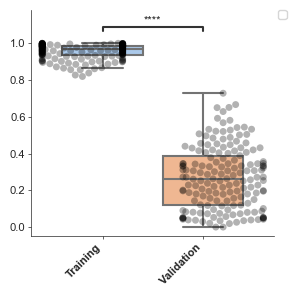

,species1,species2,species3,label,score
267,Quercus velutina,Picea abies,Pinus strobus,Validation,0.728395
189,Pinus taeda,Picea abies,Juglans nigra,Validation,0.666667
305,Picea abies,Tilia americana,Pinus strobus,Validation,0.651146
49,Acer saccharum,Quercus velutina,Picea abies,Validation,0.649962
321,Juglans nigra,Pinus strobus,Quercus nigra,Validation,0.628701
...,...,...,...,...,...
2,Acer saccharum,Pinus echinata,Ulmus americana,Training,0.856609
72,Acer saccharum,Juglans nigra,Tilia americana,Training,0.855696
144,Pinus echinata,Juglans nigra,Tilia americana,Training,0.838464
8,Acer saccharum,Pinus echinata,Juglans nigra,Training,0.827339


In [57]:
results_v3 = pd.DataFrame(scores, columns=['species1', 'species2', 'species3', 'label', 'score'])


            score
count  165.000000
mean     0.268671
std      0.169285
min      0.000000
25%      0.119240
50%      0.262626
75%      0.388889
max      0.728395


/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/sciviso/boxplot.py:121: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.swarmplot(data=vis_df, x=x, y=y, hue_order=hue_order,
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 64.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 7.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Training v.s. Validation: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.337e-55 U_stat=2.722e+04


/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 72.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 16.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 73.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/seaborn/categorical.py:3544: Use

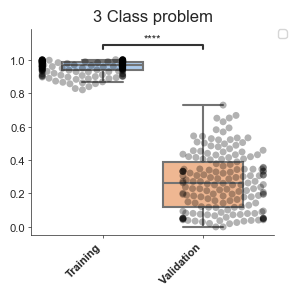

,species1,species2,species3,label,score
267,Quercus velutina,Picea abies,Pinus strobus,Validation,0.728395
189,Pinus taeda,Picea abies,Juglans nigra,Validation,0.666667
305,Picea abies,Tilia americana,Pinus strobus,Validation,0.651146
49,Acer saccharum,Quercus velutina,Picea abies,Validation,0.649962
321,Juglans nigra,Pinus strobus,Quercus nigra,Validation,0.628701
...,...,...,...,...,...
2,Acer saccharum,Pinus echinata,Ulmus americana,Training,0.856609
72,Acer saccharum,Juglans nigra,Tilia americana,Training,0.855696
144,Pinus echinata,Juglans nigra,Tilia americana,Training,0.838464
8,Acer saccharum,Pinus echinata,Juglans nigra,Training,0.827339


In [67]:
print(results_v3[results_v3['label'] == 'Validation'].describe())

boxplot = Boxplot(results_v3, "label", "score", title='3 Class problem', add_dots=True)
boxplot.plot()
plt.savefig(f'{fig_dir}Figure3_3Class.svg')
plt.show()
results_v3.sort_values(['label', 'score'], ascending=[False, False])

           score
count  55.000000
mean    0.451890
std     0.236277
min     0.000000
25%     0.291271
50%     0.453077
75%     0.583973
max     1.000000
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Training v.s. Validation: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.805e-18 U_stat=2.962e+03


/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/sciviso/boxplot.py:121: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.swarmplot(data=vis_df, x=x, y=y, hue_order=hue_order,
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 49.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 52.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


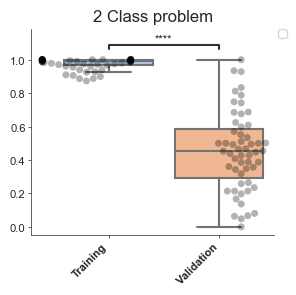

,species1,species2,species3,label,score
267,Quercus velutina,Picea abies,Pinus strobus,Validation,0.728395
189,Pinus taeda,Picea abies,Juglans nigra,Validation,0.666667
305,Picea abies,Tilia americana,Pinus strobus,Validation,0.651146
49,Acer saccharum,Quercus velutina,Picea abies,Validation,0.649962
321,Juglans nigra,Pinus strobus,Quercus nigra,Validation,0.628701
...,...,...,...,...,...
2,Acer saccharum,Pinus echinata,Ulmus americana,Training,0.856609
72,Acer saccharum,Juglans nigra,Tilia americana,Training,0.855696
144,Pinus echinata,Juglans nigra,Tilia americana,Training,0.838464
8,Acer saccharum,Pinus echinata,Juglans nigra,Training,0.827339


In [69]:
print(results[results['label'] == 'Validation'].describe())

boxplot = Boxplot(results, "label", "score", title='2 Class problem', add_dots=True)
boxplot.plot()
plt.savefig(f'{fig_dir}Figure3_2Class.svg')
plt.show()
results_v3.sort_values(['label', 'score'], ascending=[False, False])

            score
count  330.000000
mean     0.187775
std      0.115412
min      0.000000
25%      0.087839
50%      0.198082
75%      0.270058
max      0.500000


/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/sciviso/boxplot.py:121: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.swarmplot(data=vis_df, x=x, y=y, hue_order=hue_order,
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 76.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 48.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Training v.s. Validation: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.700e-109 U_stat=1.089e+05


/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 82.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 60.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 83.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/seaborn/categorical.py:3544: Use

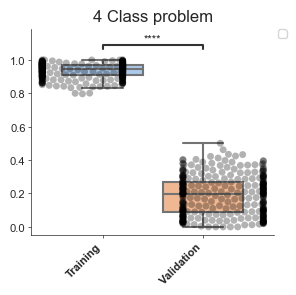

,species1,species2,species3,label,score
485,Pinus taeda,Picea abies,Juglans nigra,Validation,0.500000
451,Pinus taeda,Quercus velutina,Picea abies,Validation,0.461686
301,Pinus echinata,Ulmus americana,Quercus velutina,Validation,0.434006
555,Ulmus americana,Picea abies,Juglans nigra,Validation,0.432471
483,Pinus taeda,Picea abies,Juglans nigra,Validation,0.423851
...,...,...,...,...,...
24,Acer saccharum,Pinus echinata,Ulmus americana,Training,0.834343
324,Pinus echinata,Ulmus americana,Juglans nigra,Training,0.832519
20,Acer saccharum,Pinus echinata,Ulmus americana,Training,0.799789
54,Acer saccharum,Pinus echinata,Juglans nigra,Training,0.798901


In [70]:
print(results_v4[results_v4['label'] == 'Validation'].describe())

boxplot = Boxplot(results_v4, "label", "score", title='4 Class problem', add_dots=True)
boxplot.plot()
plt.savefig(f'{fig_dir}Figure3_4Class.svg')
plt.show()
results_v4.sort_values(['label', 'score'], ascending=[False, False])

In [58]:
scores = []
for test_species in comb_4:
    training_df = train_df[train_df.species.isin(test_species)]
    valid_df = neon_gold_df[neon_gold_df.species.isin(test_species)]
    score, clf = classify(training_df, training_cols, label='2 class training')
    scores.append([test_species[0], test_species[1], test_species[2], 'Training'] + score)
    score, clf = classify(valid_df, training_cols, clf=clf, label='2 class validation')
    scores.append([test_species[0], test_species[1], test_species[2], 'Validation'] + score)

            score
count  330.000000
mean     0.187775
std      0.115412
min      0.000000
25%      0.087839
50%      0.198082
75%      0.270058
max      0.500000


/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/sciviso/boxplot.py:121: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.swarmplot(data=vis_df, x=x, y=y, hue_order=hue_order,
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 76.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 48.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Training v.s. Validation: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.700e-109 U_stat=1.089e+05


/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 82.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 60.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 82.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/seaborn/categorical.py:3544: Use

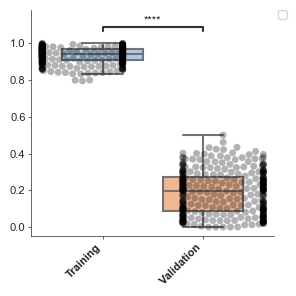

,species1,species2,species3,label,score
485,Pinus taeda,Picea abies,Juglans nigra,Validation,0.500000
451,Pinus taeda,Quercus velutina,Picea abies,Validation,0.461686
301,Pinus echinata,Ulmus americana,Quercus velutina,Validation,0.434006
555,Ulmus americana,Picea abies,Juglans nigra,Validation,0.432471
483,Pinus taeda,Picea abies,Juglans nigra,Validation,0.423851
...,...,...,...,...,...
24,Acer saccharum,Pinus echinata,Ulmus americana,Training,0.834343
324,Pinus echinata,Ulmus americana,Juglans nigra,Training,0.832519
20,Acer saccharum,Pinus echinata,Ulmus americana,Training,0.799789
54,Acer saccharum,Pinus echinata,Juglans nigra,Training,0.798901


In [59]:
results_v4 = pd.DataFrame(scores, columns=['species1', 'species2', 'species3', 'label', 'score'])
print(results_v4[results_v4['label'] == 'Validation'].describe())

boxplot = Boxplot(results_v4, "label", "score", add_dots=True)
boxplot.plot()
plt.show()
results_v4.sort_values(['label', 'score'], ascending=[False, False])

Pinus palustris            40
Pseudotsuga menziesii      40
Acer rubrum                25
Quercus stellata           22
Acer saccharum             17
Quercus rubra              16
Tsuga canadensis           15
Populus tremuloides        15
Tsuga heterophylla         15
Metrosideros polymorpha    13
Pinus contorta             13
Abies balsamea             13
Picea engelmannii          13
Liquidambar styraciflua    12
Quercus alba               12
Abies lasiocarpa           11

In [71]:
sp_2 = ['Quercus velutina', 'Picea abies']
sp_2_imb = ['Juglans nigra', 'Quercus velutina']
sp_3 = ['Quercus velutina', 'Picea abies', 'Pinus strobus']
sp_4 = ['Quercus velutina', 'Pinus taeda', 'Picea abies', 'Juglans nigra']


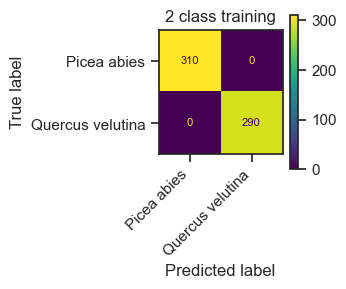

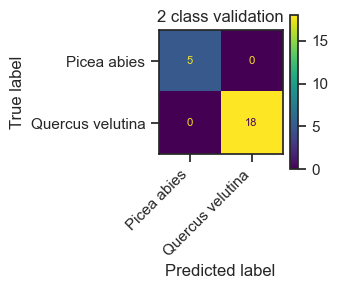

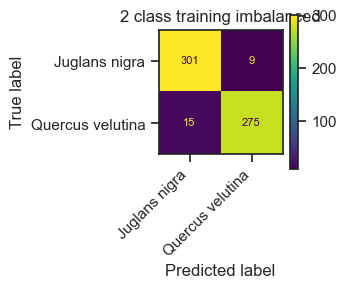

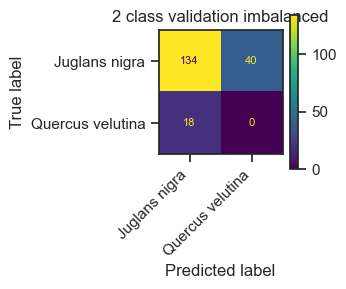

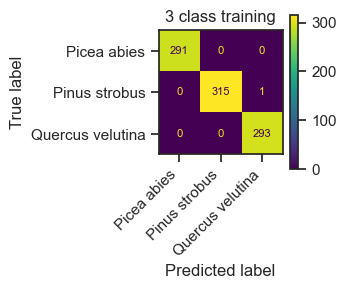

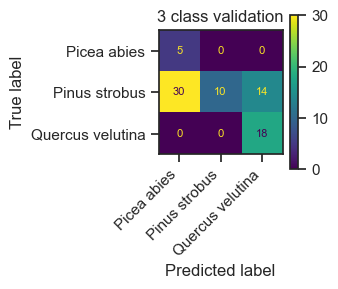

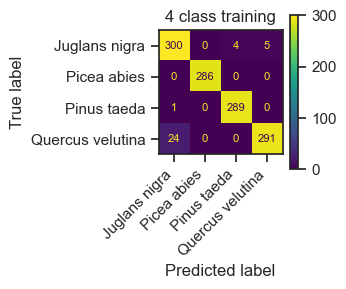

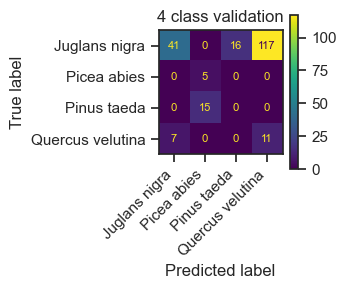

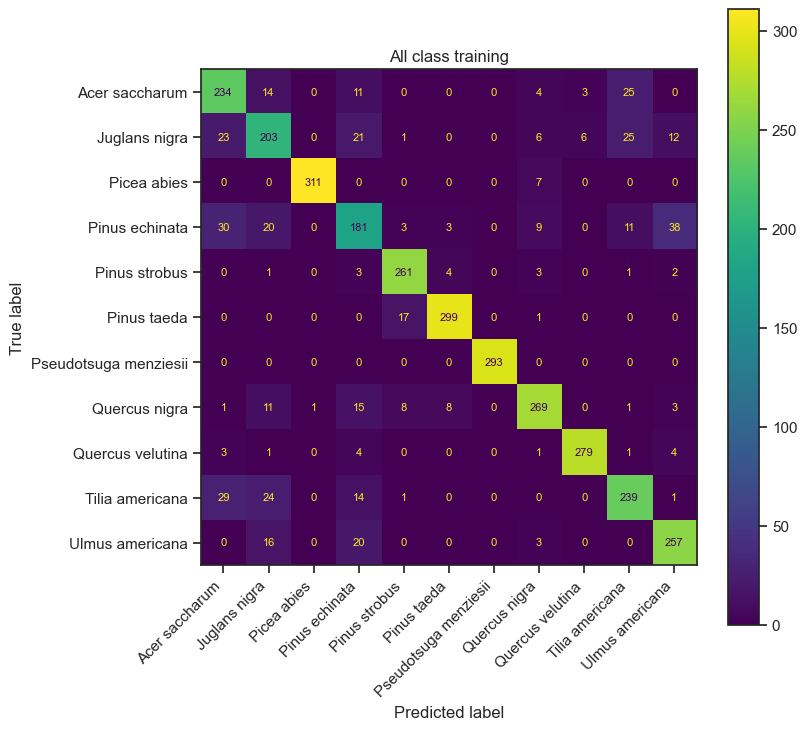

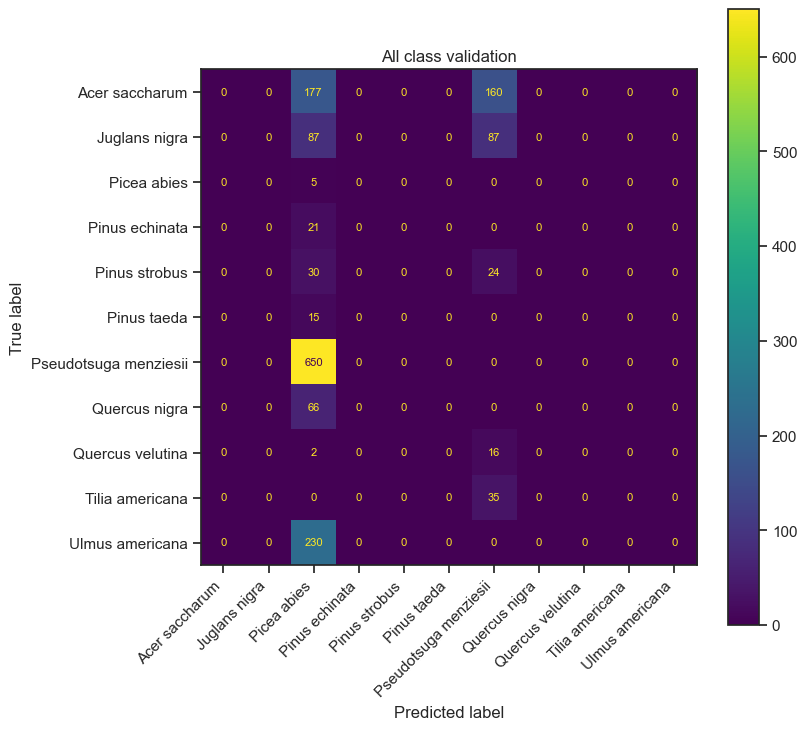

In [79]:
bands = [1, 2, 3, 4, 5, 6, 7, 8]
plt.rcParams["figure.figsize"] = (2,2)
training_cols = [f'band_{i}' for i in bands] + ['nitian', 'ndvi', 'sr', 'tvi', 'gi', 'gndvi', 'pri', 'osavi', 'tcari', 'redge', 'redge2',
            'siredge', 'normg', 'schl', 'schlcar']

# Run our tests! 
# ---------- 2 class problem with the largest classes in validation
test_species = sp_2
training_df = train_df[train_df.species.isin(test_species)]
valid_df = neon_gold_df[neon_gold_df.species.isin(test_species)]
clf = classify(training_df, training_cols, label='2 class training')
clf = classify(valid_df, training_cols, clf=clf, label='2 class validation')

# ---------- 2 class problem with imbalance
test_species = sp_2_imb
training_df = train_df[train_df.species.isin(test_species)]
valid_df = neon_gold_df[neon_gold_df.species.isin(test_species)]
clf = classify(training_df, training_cols, label='2 class training imbalanced')
clf = classify(valid_df, training_cols, clf=clf, label='2 class validation imbalanced')

# ---------- 3 class problem
test_species = sp_3
training_df = train_df[train_df.species.isin(test_species)]
valid_df = neon_gold_df[neon_gold_df.species.isin(test_species)]
clf = classify(training_df, training_cols, label='3 class training')
clf = classify(valid_df, training_cols, clf=clf, label='3 class validation')

# ---------- 4 class problem
test_species = sp_4
training_df = train_df[train_df.species.isin(test_species)]
valid_df = neon_gold_df[neon_gold_df.species.isin(test_species)]
clf = classify(training_df, training_cols, label='4 class training')
clf = classify(valid_df, training_cols, clf=clf, label='4 class validation')

plt.rcParams["figure.figsize"] = (8,8)

# ---------- All
training_df = train_df.copy() #[train_df.species.isin(test_species)]
valid_df = neon_gold_df.copy() #[neon_gold_df.species.isin(test_species)]
clf = classify(training_df, training_cols, label='All class training')
clf = classify(valid_df, training_cols, clf=clf, label='All class validation')



balanced_accuracy_score 1.0


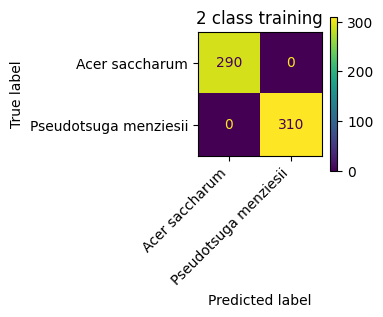

balanced_accuracy_score 0.20599634786578408


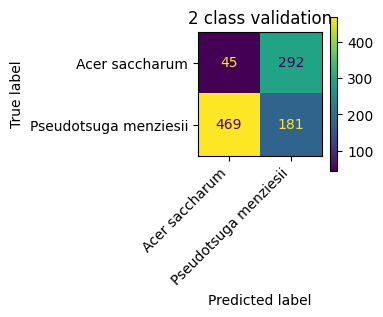

balanced_accuracy_score 1.0


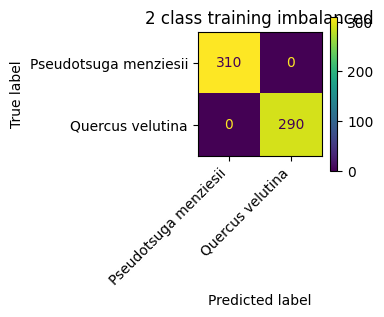

balanced_accuracy_score 0.2453846153846154


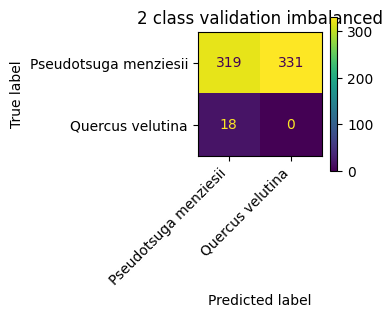

balanced_accuracy_score 0.9738150599898621


/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


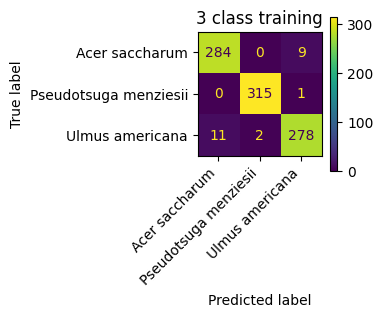

balanced_accuracy_score 0.10262133256585586


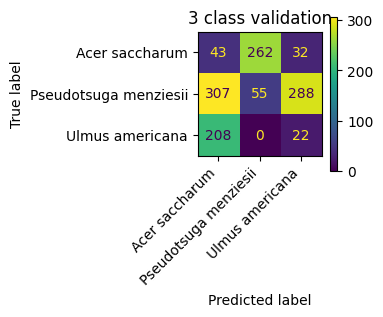

balanced_accuracy_score 0.9260922985060916


/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


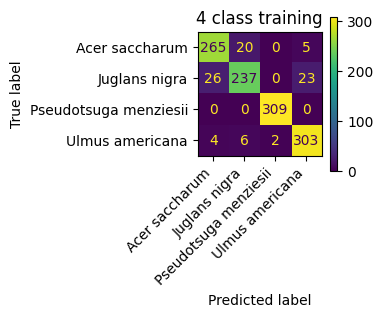

balanced_accuracy_score 0.09807948114507001


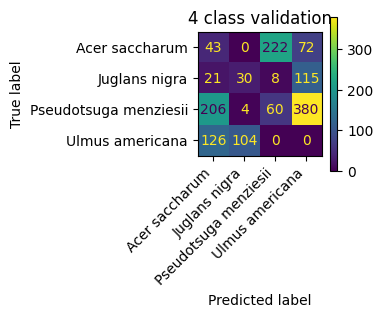

/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


balanced_accuracy_score 0.8401996295947818


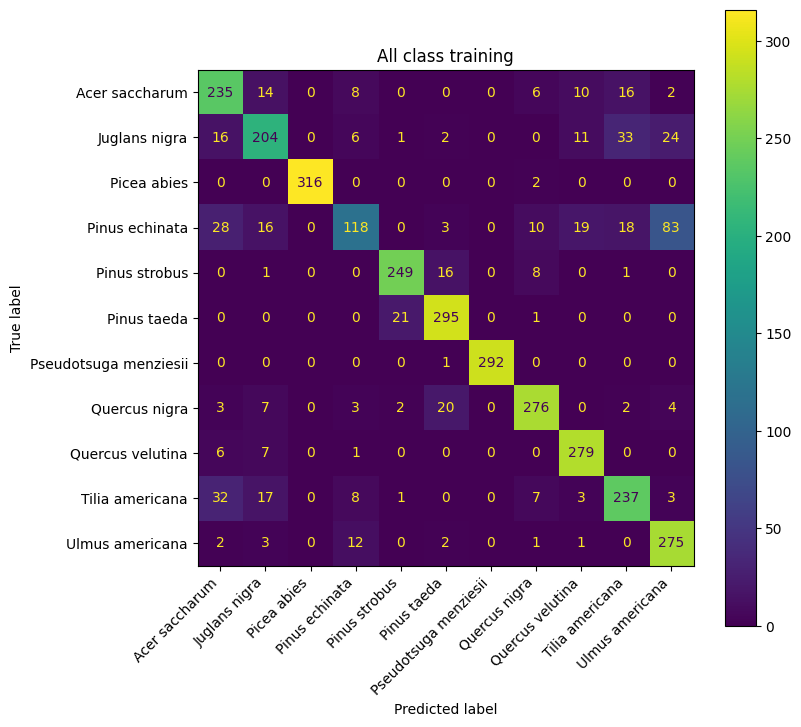

balanced_accuracy_score 0.0156759099785806


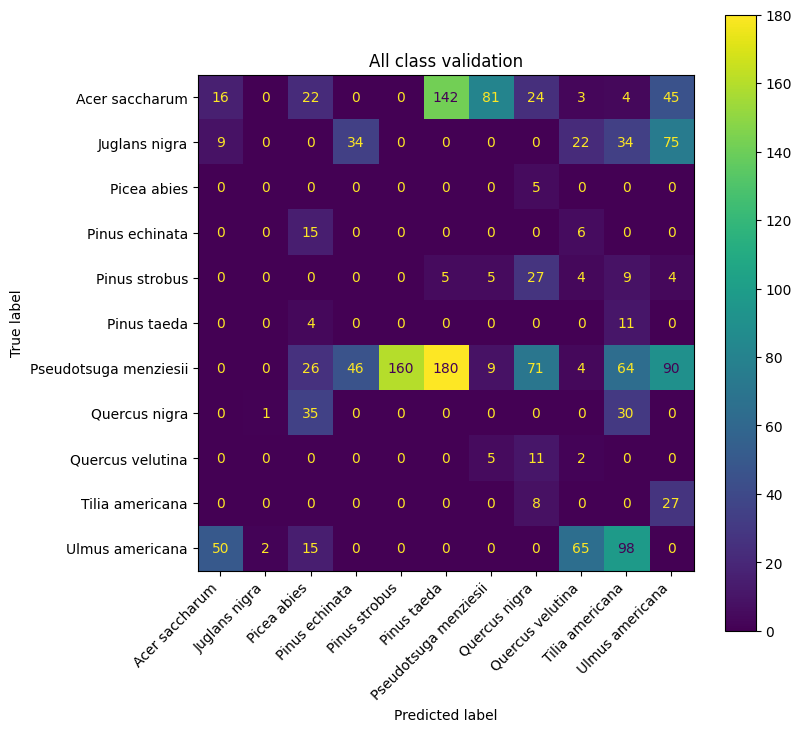

In [14]:
bands = [1, 2, 3, 4, 5, 6, 7, 8]
plt.rcParams["figure.figsize"] = (2,2)
training_cols = [f'band_{i}' for i in bands] + ['nitian', 'ndvi', 'sr', 'tvi', 'gi', 'gndvi', 'pri', 'osavi', 'tcari', 'redge', 'redge2',
            'siredge', 'normg', 'schl', 'schlcar']

# Run our tests! 
# ---------- 2 class problem with the largest classes in validation
test_species = sp_2
training_df = train_df[train_df.species.isin(test_species)]
valid_df = neon_gold_df[neon_gold_df.species.isin(test_species)]
clf = classify(training_df, training_cols, label='2 class training', clf_type='svm')
clf = classify(valid_df, training_cols, clf=clf, label='2 class validation')

# ---------- 2 class problem with imbalance
test_species = sp_2_imb
training_df = train_df[train_df.species.isin(test_species)]
valid_df = neon_gold_df[neon_gold_df.species.isin(test_species)]
clf = classify(training_df, training_cols, label='2 class training imbalanced', clf_type='svm')
clf = classify(valid_df, training_cols, clf=clf, label='2 class validation imbalanced')

# ---------- 3 class problem
test_species = sp_3
training_df = train_df[train_df.species.isin(test_species)]
valid_df = neon_gold_df[neon_gold_df.species.isin(test_species)]
clf = classify(training_df, training_cols, label='3 class training', clf_type='svm')
clf = classify(valid_df, training_cols, clf=clf, label='3 class validation')

# ---------- 4 class problem
test_species = sp_4
training_df = train_df[train_df.species.isin(test_species)]
valid_df = neon_gold_df[neon_gold_df.species.isin(test_species)]
clf = classify(training_df, training_cols, label='4 class training', clf_type='svm')
clf = classify(valid_df, training_cols, clf=clf, label='4 class validation')

plt.rcParams["figure.figsize"] = (8,8)

# ---------- All
training_df = train_df.copy() #[train_df.species.isin(test_species)]
valid_df = neon_gold_df.copy() #[neon_gold_df.species.isin(test_species)]
clf = classify(training_df, training_cols, label='All class training', clf_type='svm')
clf = classify(valid_df, training_cols, clf=clf, label='All class validation')



Pinus palustris            40
Pseudotsuga menziesii      40
Acer rubrum                25
Quercus stellata           22
Acer saccharum             17
Quercus rubra              16
Tsuga canadensis           15
Populus tremuloides        15
Tsuga heterophylla         15
Metrosideros polymorpha    13
Pinus contorta             13
Abies balsamea             13
Picea engelmannii          13
Liquidambar styraciflua    12
Quercus alba               12
Abies lasiocarpa           11

balanced_accuracy_score 0.8931204926667207


/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


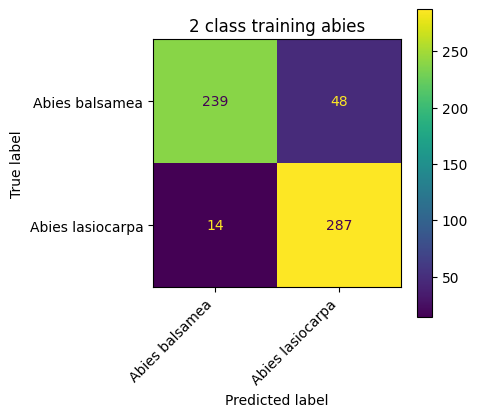

balanced_accuracy_score 0.6958041958041958


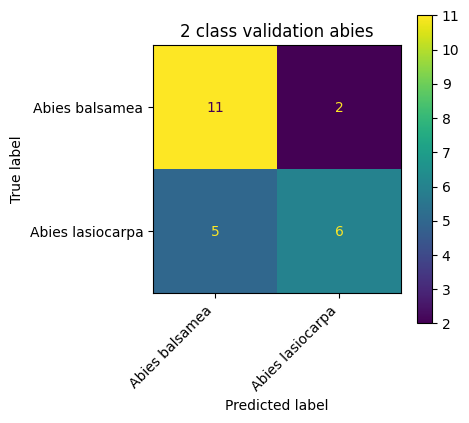

balanced_accuracy_score 0.7878754171301445


/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


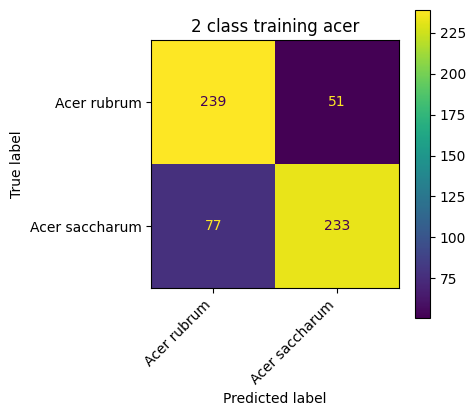

balanced_accuracy_score 0.39294117647058824


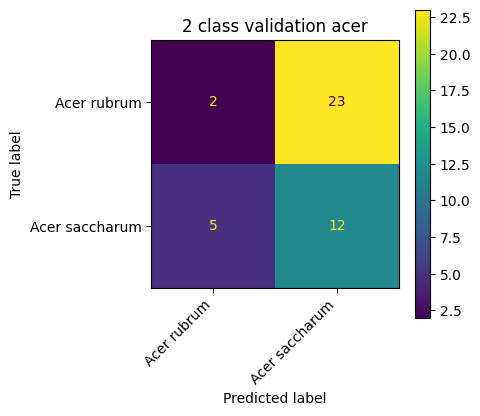

balanced_accuracy_score 0.8267154301637061


/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


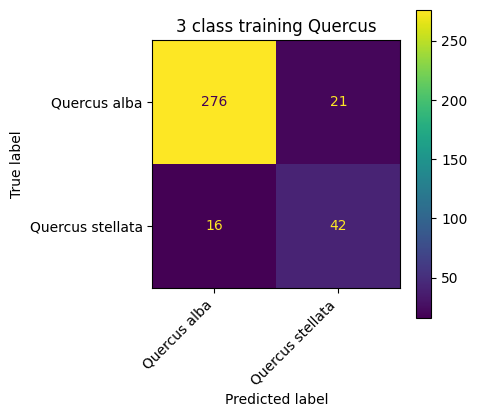

balanced_accuracy_score 0.5189393939393939


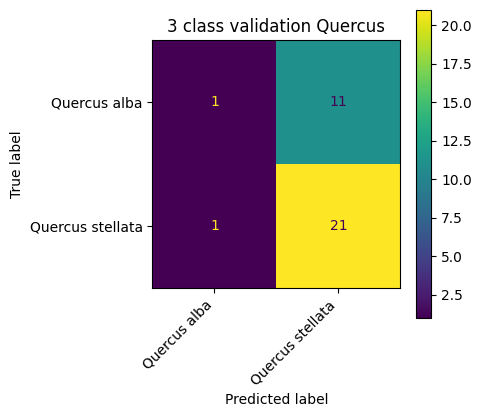

balanced_accuracy_score 0.9899665551839465


/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


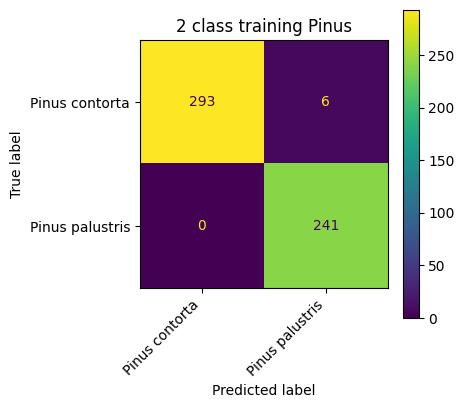

balanced_accuracy_score 0.5490384615384616


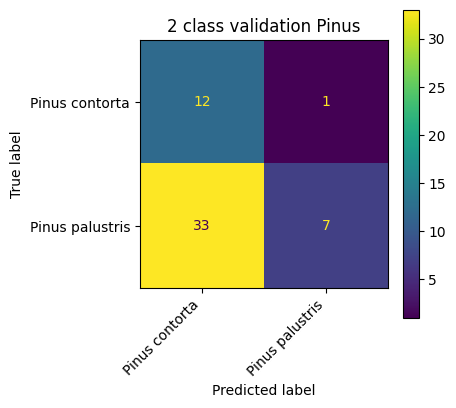

In [38]:
bands = [1, 2, 3, 4, 5, 6, 7, 8]
training_cols = [f'band_{i}' for i in bands] + ['nitian', 'ndvi', 'sr', 'tvi', 'gi', 'gndvi', 'pri', 'osavi', 'tcari', 'redge', 'redge2',
            'siredge', 'normg', 'schl', 'schlcar']

plt.rcParams["figure.figsize"] = (4,4)

# Run our tests! 
# ---------- 2 class problem with the largest classes in validation
test_species = ['Abies lasiocarpa', 'Abies balsamea']
training_df = train_df[train_df.species.isin(test_species)]
valid_df = neon_gold_df[neon_gold_df.species.isin(test_species)]
clf = classify(training_df, training_cols, label='2 class training abies', clf_type='svm')
clf = classify(valid_df, training_cols, clf=clf, label='2 class validation abies')

# ---------- 2 class problem with imbalance
test_species = ['Acer rubrum', 'Acer saccharum']
training_df = train_df[train_df.species.isin(test_species)]
valid_df = neon_gold_df[neon_gold_df.species.isin(test_species)]
clf = classify(training_df, training_cols, label='2 class training acer', clf_type='svm')
clf = classify(valid_df, training_cols, clf=clf, label='2 class validation acer')

# ---------- 3 class problem
test_species = ['Quercus stellata', 'Quercus alba', 'Quercus stellata']
training_df = train_df[train_df.species.isin(test_species)]
valid_df = neon_gold_df[neon_gold_df.species.isin(test_species)]
clf = classify(training_df, training_cols, label='3 class training Quercus', clf_type='svm')
clf = classify(valid_df, training_cols, clf=clf, label='3 class validation Quercus')

# ---------- 2 class problem
test_species = ['Pinus palustris', 'Pinus contorta']
training_df = train_df[train_df.species.isin(test_species)]
valid_df = neon_gold_df[neon_gold_df.species.isin(test_species)]
clf = classify(training_df, training_cols, label='2 class training Pinus', clf_type='svm')
clf = classify(valid_df, training_cols, clf=clf, label='2 class validation Pinus')


balanced_accuracy_score 0.9641439105420955


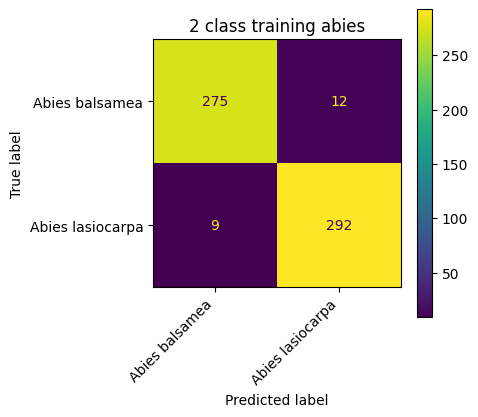

balanced_accuracy_score 0.6433566433566433


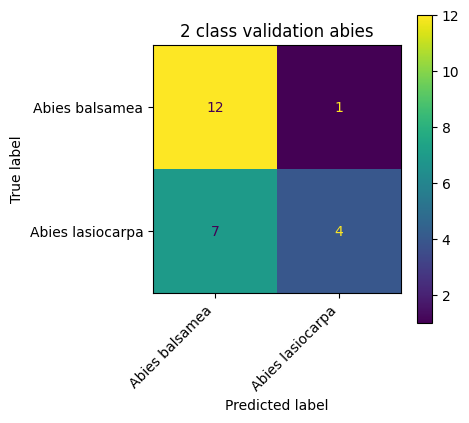

balanced_accuracy_score 0.9078420467185762


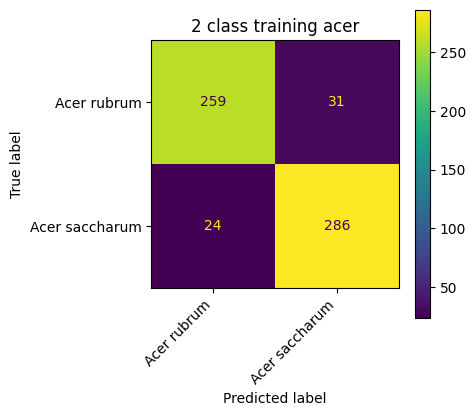

balanced_accuracy_score 0.5


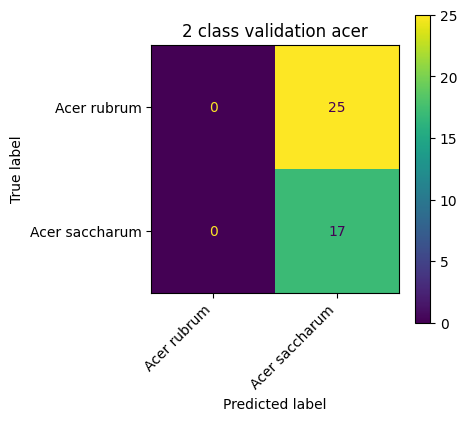

balanced_accuracy_score 0.8069778242192036


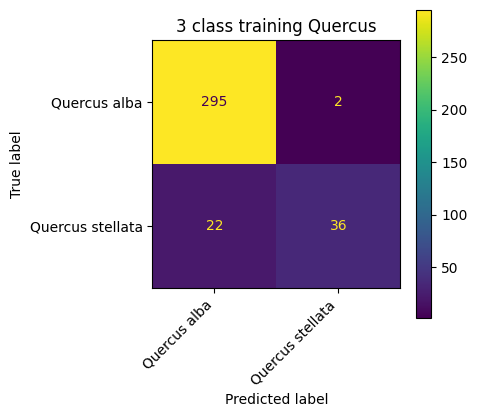

balanced_accuracy_score 0.4962121212121212


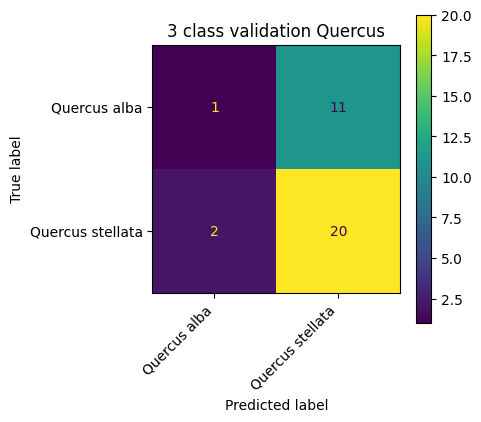

balanced_accuracy_score 0.9962530704006439


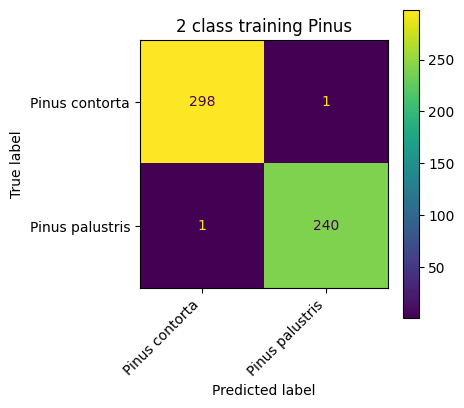

balanced_accuracy_score 0.525


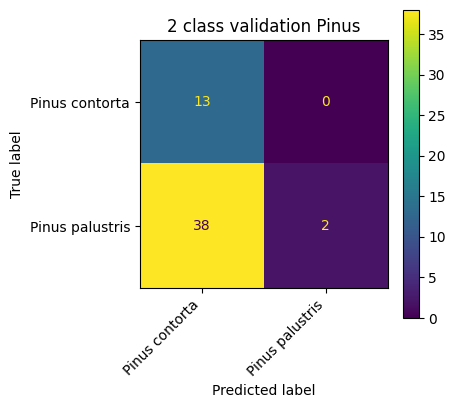

In [39]:
bands = [1, 2, 3, 4, 5, 6, 7, 8]
training_cols = [f'band_{i}' for i in bands] + ['nitian', 'ndvi', 'sr', 'tvi', 'gi', 'gndvi', 'pri', 'osavi', 'tcari', 'redge', 'redge2',
            'siredge', 'normg', 'schl', 'schlcar']

plt.rcParams["figure.figsize"] = (4,4)

# Run our tests! 
# ---------- 2 class problem with the largest classes in validation
test_species = ['Abies lasiocarpa', 'Abies balsamea']
training_df = train_df[train_df.species.isin(test_species)]
valid_df = neon_gold_df[neon_gold_df.species.isin(test_species)]
clf = classify(training_df, training_cols, label='2 class training abies')
clf = classify(valid_df, training_cols, clf=clf, label='2 class validation abies')

# ---------- 2 class problem with imbalance
test_species = ['Acer rubrum', 'Acer saccharum']
training_df = train_df[train_df.species.isin(test_species)]
valid_df = neon_gold_df[neon_gold_df.species.isin(test_species)]
clf = classify(training_df, training_cols, label='2 class training acer')
clf = classify(valid_df, training_cols, clf=clf, label='2 class validation acer')

# ---------- 3 class problem
test_species = ['Quercus stellata', 'Quercus alba', 'Quercus stellata']
training_df = train_df[train_df.species.isin(test_species)]
valid_df = neon_gold_df[neon_gold_df.species.isin(test_species)]
clf = classify(training_df, training_cols, label='3 class training Quercus')
clf = classify(valid_df, training_cols, clf=clf, label='3 class validation Quercus')

# ---------- 2 class problem
test_species = ['Pinus palustris', 'Pinus contorta']
training_df = train_df[train_df.species.isin(test_species)]
valid_df = neon_gold_df[neon_gold_df.species.isin(test_species)]
clf = classify(training_df, training_cols, label='2 class training Pinus')
clf = classify(valid_df, training_cols, clf=clf, label='2 class validation Pinus')
